In [2]:
from constants import *
from obfuscation import *
from run_obfuscation import * 
from data_utils import *
from stereo_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
from pathlib import Path

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
dataset_files = list(read_dataset_to_obfuscate(f"{ROOT_DIR}/obfuscation/ml-1m"))
original_data = { data_slice:transform_to_obf(data) for data_slice,data in zip(['train','valid','test'],dataset_files)}


In [3]:
data_dir = f"{ROOT_DIR}/obfuscation/ml-1m"
def calculate_dataset_stereo(data_dir,stereo_types=["mean","median"]):
    train_data, valid_data, test_data, inclination_data, user_features, dataset_name  = read_dataset_to_obfuscate(data_dir)
    for stereo_type in stereo_types:
        user_stereo_scores = []
        for user  in user_features["userID"].values:        
            user_data, valid_user_items, user_ff_values, user_stereo_score = prepare_user_to_obf(ff_data=inclination_data,sterotyp_method=stereo_type,train_data=train_data,user=user)
            user_stereo_scores.append(user_stereo_score)
        user_features[f"stereo_{stereo_type}"] = user_stereo_scores
    return user_features
def read_dataset_stereo(data_dir):
    dataset_name = data_dir.split("/")[-1]
    return pd.read_csv(f"{data_dir}/{dataset_name}_user_ster.csv",index_col="userID")

In [103]:
obf_dir = f"{ROOT_DIR}/obfuscation"
data_dirs = !ls {ROOT_DIR}/ob*
dataset = "ml-1m-1000_"
data_dict = {url:f"{obf_dir}/{url}" for url in data_dirs if url.startswith(dataset)} 

In [104]:
obf_dict_datasets={}
original_ster_data = read_dataset_stereo(f"{obf_dir}/ml-1m-1000")
for dset,url in data_dict.items():
    print(f"Proessing: {dset}")
    obf_dict_datasets[dset]=read_dataset_stereo(url)
    obf_dict_datasets[dset][dset]=obf_dict_datasets[dset]
    obf_dict_datasets[dset]=obf_dict_datasets[dset][dset]


Proessing: ml-1m-1000_imputate_0.05_ff_mean-abs_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_mean_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_median-abs_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_median_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_mean-abs_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_mean_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_median-abs_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_median_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean-abs_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_median-abs_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.25
Proessing: ml-1m-1000_remove_0.15_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.1_ff_inc_ratio_th0.

In [109]:
list_data =list(obf_dict_datasets.values())
list_data.append(original_ster_data["mean-"])
perturbated_datasets = pd.concat(list_data,axis=1)


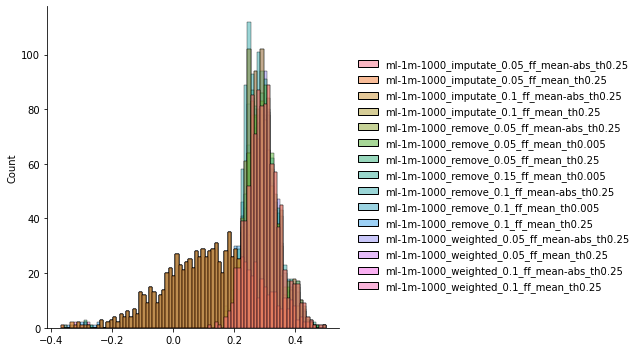

In [110]:
sns.displot(perturbated_datasets[[c for c in perturbated_datasets.columns if "mean" in c ]])

In [106]:
data_plot = perturbated_datasets[[c for c in perturbated_datasets.columns if "median" in c ]].sort_values("median",ascending=False)
sns.heatmap(data_plot[:50].T,cmap="Blues")

KeyError: 'median'

Proessing: ml-1m-1000_imputate_0.05_ff_mean-abs_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_mean_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_median-abs_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_median_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_mean-abs_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_mean_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_median-abs_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_median_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean-abs_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_median-abs_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.25
Proessing: ml-1m-1000_remove_0.15_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.1_ff_inc_ratio_th0.

<AxesSubplot:ylabel='userID'>

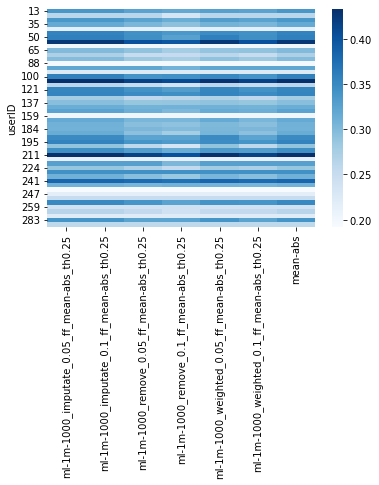

In [129]:
obf_dict_datasets={}
original_ster_data = read_dataset_stereo(f"{obf_dir}/ml-1m-1000")
for dset,url in data_dict.items():
    print(f"Proessing: {dset}")
    obf_dict_datasets[dset]=read_dataset_stereo(url)
    obf_dict_datasets[dset][dset]=obf_dict_datasets[dset]
    obf_dict_datasets[dset]=obf_dict_datasets[dset][dset]
list_data =list(obf_dict_datasets.values())
ster_type = "mean-abs"
list_data.append(original_ster_data[ster_type])
perturbated_datasets = pd.concat(list_data,axis=1)
data_plot = perturbated_datasets[[c for c in perturbated_datasets.columns if ster_type in c ]]#.sort_values("mean",ascending=False)
sns.heatmap(data_plot[:50],cmap="Blues")

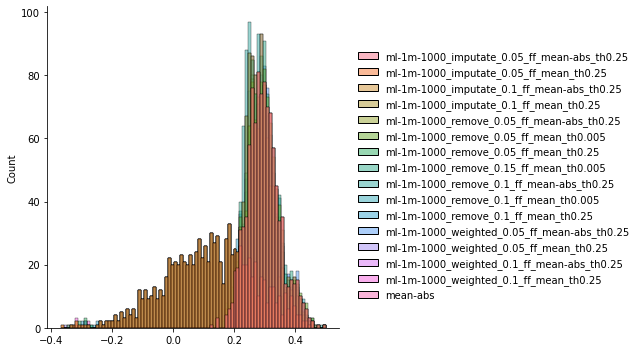

In [127]:
sns.displot(perturbated_datasets[[c for c in perturbated_datasets.columns if "mean" in c ]])

In [131]:
data_plot.describe().T.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
ml-1m-1000_remove_0.1_ff_mean-abs_th0.25,1000.0,0.280971,0.049355,0.124789,0.246393,0.275477,0.308298,0.482473
ml-1m-1000_remove_0.05_ff_mean-abs_th0.25,1000.0,0.287592,0.051463,0.124789,0.250332,0.284251,0.315536,0.500137
ml-1m-1000_weighted_0.1_ff_mean-abs_th0.25,1000.0,0.287592,0.051463,0.124789,0.250332,0.284251,0.315536,0.500137
ml-1m-1000_weighted_0.05_ff_mean-abs_th0.25,1000.0,0.292397,0.052832,0.124789,0.256994,0.289192,0.321125,0.500137
ml-1m-1000_imputate_0.05_ff_mean-abs_th0.25,1000.0,0.296745,0.054123,0.124789,0.260972,0.293574,0.327995,0.500137
ml-1m-1000_imputate_0.1_ff_mean-abs_th0.25,1000.0,0.296745,0.054123,0.124789,0.260972,0.293574,0.327995,0.500137
mean-abs,1000.0,0.296745,0.054123,0.124789,0.260972,0.293574,0.327995,0.500137


In [4]:
def get_ofb_grouped_results(data_root,dataset, attribute):
    data_results=pd.read_csv(f"{data_root}/{dataset}/test_set_attacker_evaluation.csv")#,skiprows=1,names=["dataset","gender_bacc_mean","gender_bac_std"])
    grouped = data_results.groupby("dataset")[attribute].agg("mean","std").reset_index()
    grouped["dataset_name"]=grouped["dataset"]
    grouped[["dataset","obf_method","p_sample","sample_method",
             "user_ster_method","user_ster_threshold"]]=pd.DataFrame(grouped["dataset"].str.split("_").to_list(),index=grouped.index)
    grouped["conf"]=grouped["dataset_name"].apply(lambda x: "_".join(x.split("_")[1:-1]) if len(x.split("_"))>1 else "original")
    grouped.fillna("original",inplace=True)
   # print(grouped.head())
    return grouped
def get_recs_results(url):
    data=pd.read_csv(url)
    data["dataset_name"]=data["dataset"]
    data[["dataset","obf_method","p_sample","sample_method",
             "user_ster_method","user_ster_threshold"]]=pd.DataFrame(data["dataset"].str.split("_").to_list(),index=data.index)
    data["conf"]=data["dataset_name"].apply(lambda x: "_".join(x.split("_")[1:-1]) if len(x.split("_"))>1 else "original")
    data.fillna("original",inplace=True)
   # print(grouped.head())
    return data

In [125]:
all_small_datasets_root  = "/share/rk4/home/gustavoe/all_full_test"
dataset = "ml-1m"
attribute = "gender_bacc"
ml_results = get_ofb_grouped_results(all_small_datasets_root,"ml-1m",attribute)
lfm_results = get_ofb_grouped_results(all_small_datasets_root,"lfm-100k",attribute)

<AxesSubplot:xlabel='gender_bacc', ylabel='obf_method'>

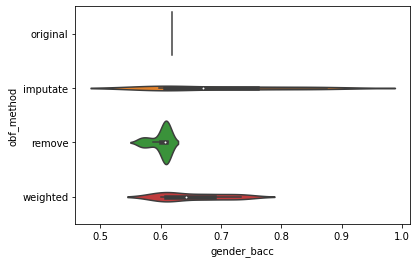

In [126]:
sns.violinplot(ml_results,x=attribute, y="obf_method")


<AxesSubplot:xlabel='gender_bacc', ylabel='obf_method'>

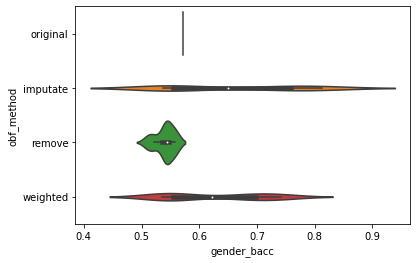

In [127]:
sns.violinplot(lfm_results,x=attribute, y="obf_method")

In [76]:

results_recs = pd.read_csv("/share/rk4/home/gustavoe/obfuscation/full_train/result_table-right.csv")

In [149]:
results_recs[["dataset","obf_method","p_sample","sample_method","user_ster_method","user_ster_threshold"]]=pd.DataFrame(results_recs["dataset"].str.split("_").to_list(),index=results_recs.index).astype(str)

In [77]:
merged_df = pd.concat([ml_results,lfm_results] ,axis=0,ignore_index=True)
merged_df = merged_df.merge(results_recs,how="left",left_on="dataset_name",right_on="dataset"
                                  )

In [155]:
merged_df.fillna("original",inplace=True)

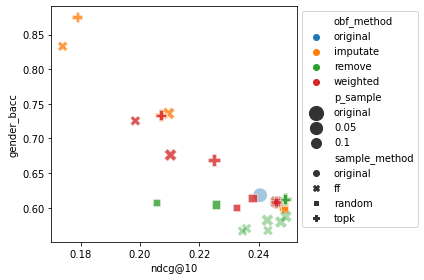

In [78]:
ax = sns.scatterplot(merged_df[merged_df["dataset_x"]=="ml-1m"],
                x="ndcg@10",y=attribute,hue="obf_method",
                style="sample_method",
                size="p_sample",
                sizes=(100,200),alpha=0.4)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("figures/ml-1m_bacc_ndcg.png",dpi=250)


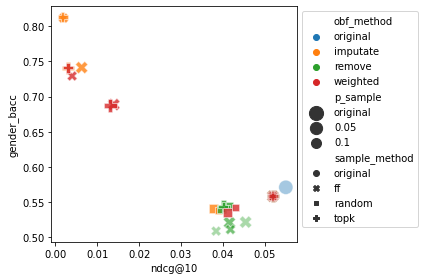

In [79]:
ax2 =sns.scatterplot(merged_df[merged_df["dataset_x"]=="lfm-100k"],x="ndcg@10",
                     y=attribute,hue="obf_method",style="sample_method",size="p_sample",sizes=(100,200),alpha=0.4)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("figures/lfm-100k_bacc_ndcg.png",dpi=250)
#In the end there is no place like /home/gustavoe/portraits/sendlicholieinsamdkeit~keitao/

In [176]:
sub_data = merged_df[["dataset_x","dataset_name","ndcg@10","gender_bacc",'obf_method', 'p_sample',

       'sample_method', 'user_ster_method']]

/tmp/ipykernel_329100/3606219402.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=sub_data,x="ndcg@10",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))
/tmp/ipykernel_329100/3606219402.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=sub_data,x="ndcg@10",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))


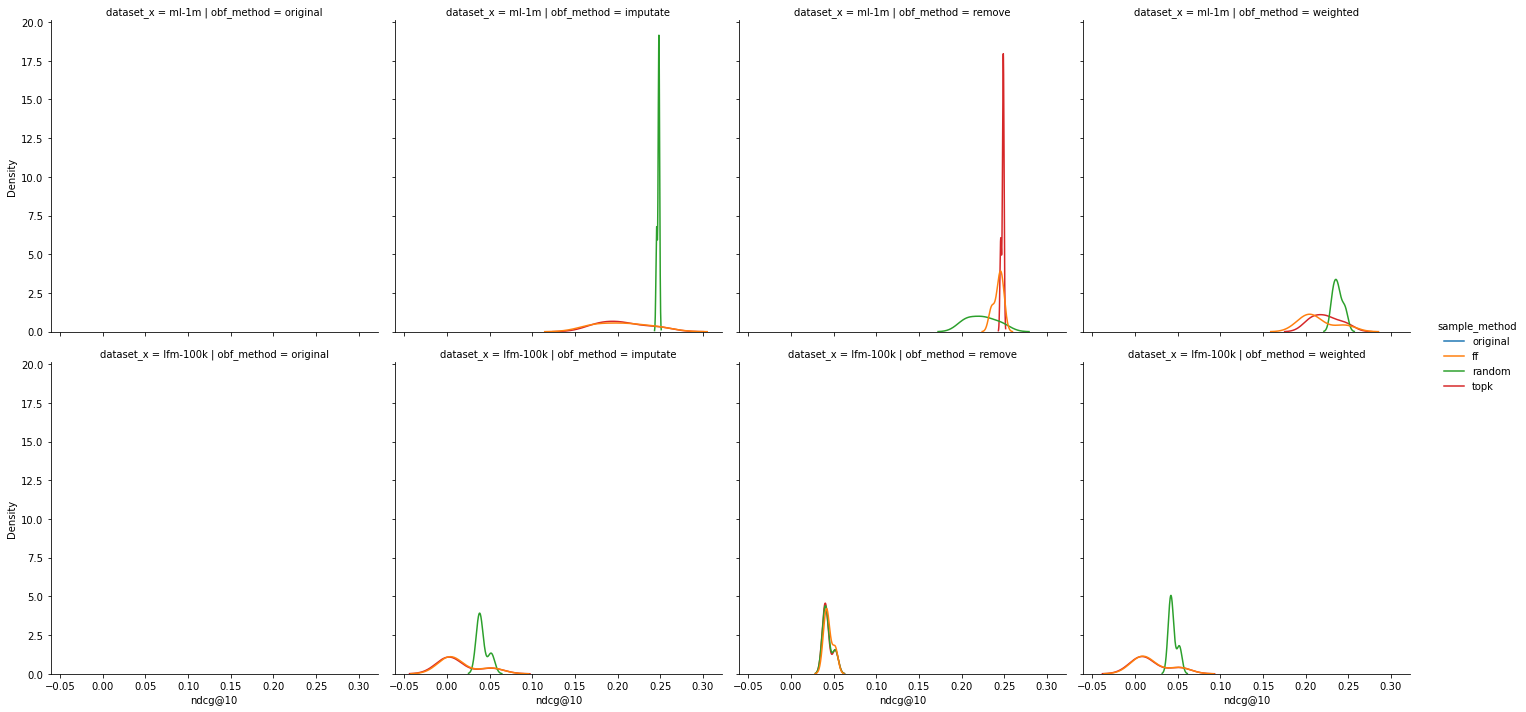

In [197]:
sns.displot(data=sub_data,x="ndcg@10",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))



In [23]:
all_small_datasets_root  = "/share/rk4/home/gustavoe/all_test_mean_stereo"
all_rec_datasets_root  = "/share/rk4/home/gustavoe/obfuscation/all_test_mean_stereo"

attribute = "gender_bacc"
metric_rec = "ndcg@10"
param_cols =["dataset","dataset_name",metric_rec,attribute,
             'obf_method', 'p_sample','sample_method', 'user_ster_method']
alg= "BPR"
def plot_results(all_small_datasets_root  = "/share/rk4/home/gustavoe/all_test_mean_stereo",
                 all_rec_datasets_root  = "/share/rk4/home/gustavoe/obfuscation/all_test_mean_stereo",
    attribute = "gender_bacc",
    metric_rec = "ndcg@10",
    param_cols =["dataset","dataset_name",metric_rec,attribute,
                'obf_method', 'p_sample','sample_method', 'user_ster_method'],
    alg= "BPR"):
    ml_results = get_ofb_grouped_results(all_small_datasets_root,"ml-1m",attribute)
    lfm_results = get_ofb_grouped_results(all_small_datasets_root,"lfm-100k",attribute)
    common_datasets = np.intersect1d(ml_results["conf"].unique(),lfm_results["conf"].unique())

    ml_results = ml_results[ml_results["conf"].isin(common_datasets)]
    lfm_results= lfm_results[lfm_results["conf"].isin(common_datasets)]

    results_atk = pd.concat([ml_results,lfm_results] ,axis=0,ignore_index=True)
    results_recs = pd.read_csv(f"{all_rec_datasets_root}/result_{alg}.csv")

    print(len(common_datasets),len(ml_results),len(lfm_results),len(results_recs["dataset"]))

    merged_df = results_recs.merge(results_atk,how="inner",left_on="dataset",right_on="dataset_name",suffixes=["_rec",""])
    merged_df.sort_values(["dataset_name"],inplace=True)
    sorted_data = merged_df[param_cols].sort_values(["dataset",attribute,metric_rec])                                 
    top20_variants = sorted_data.groupby(["dataset"]).head(20).reset_index()
    print(top20_variants[param_cols])

    ax = sns.scatterplot(merged_df[merged_df["dataset"]=="ml-1m"],
                    x=metric_rec,y=attribute,hue="obf_method",
                    style="sample_method",
                    size="p_sample",
                    sizes=(50,200),alpha=0.4)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    #plt.xlim(0.343,0.345)
    plt.tight_layout()
    plt.savefig(f"figures/ml-1m_bacc_ndcg_{alg}.png",dpi=250)
    plt.show()
    ax2 =sns.scatterplot(merged_df[merged_df["dataset"]=="lfm-100k"],
                        x=metric_rec,y=attribute,hue="obf_method",
                        style="sample_method",size="p_sample",
                        sizes=(50,200),alpha=0.4)
    sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.savefig(f"figures/lfm-100k_bacc_ndcg_{alg}.png",dpi=250)
    plt.show()
    return merged_df
#In the end there is no place like /home/gustavoe/silence-number-seven

37 37 37 110
     dataset                                     dataset_name   ndcg@10  \
0   lfm-100k         lfm-100k_remove_0.1_ff_median-abs_th0.39  0.113845   
1   lfm-100k        lfm-100k_remove_0.05_ff_median-abs_th0.39  0.119544   
2   lfm-100k    lfm-100k_remove_0.05_random_median-abs_th0.39  0.113247   
3   lfm-100k  lfm-100k_weighted_0.05_random_median-abs_th0.39  0.115398   
4   lfm-100k     lfm-100k_remove_0.1_random_median-abs_th0.39  0.107048   
5   lfm-100k   lfm-100k_weighted_0.1_random_median-abs_th0.39  0.105526   
6   lfm-100k   lfm-100k_imputate_0.1_random_median-abs_th0.39  0.098988   
7   lfm-100k      lfm-100k_remove_0.05_topk_median-abs_th0.39  0.122351   
8   lfm-100k       lfm-100k_remove_0.1_topk_median-abs_th0.39  0.122351   
9   lfm-100k  lfm-100k_imputate_0.05_random_median-abs_th0.39  0.108109   
10  lfm-100k                                         lfm-100k  0.113485   
11  lfm-100k        lfm-100k_imputate_0.05_ff_mean-abs_th0.39  0.120948   
12  lfm-100k

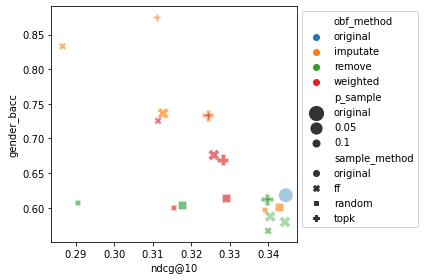

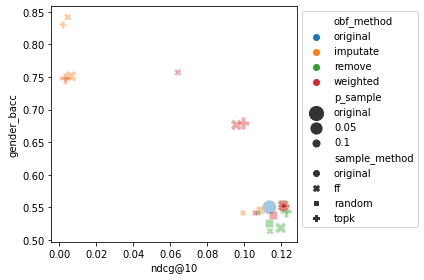

37 37 37 74
     dataset                                     dataset_name   ndcg@10  \
0   lfm-100k         lfm-100k_remove_0.1_ff_median-abs_th0.39  0.144127   
1   lfm-100k        lfm-100k_remove_0.05_ff_median-abs_th0.39  0.144781   
2   lfm-100k    lfm-100k_remove_0.05_random_median-abs_th0.39  0.140218   
3   lfm-100k  lfm-100k_weighted_0.05_random_median-abs_th0.39  0.151346   
4   lfm-100k     lfm-100k_remove_0.1_random_median-abs_th0.39  0.132398   
5   lfm-100k   lfm-100k_weighted_0.1_random_median-abs_th0.39  0.150374   
6   lfm-100k   lfm-100k_imputate_0.1_random_median-abs_th0.39  0.160688   
7   lfm-100k      lfm-100k_remove_0.05_topk_median-abs_th0.39  0.151763   
8   lfm-100k       lfm-100k_remove_0.1_topk_median-abs_th0.39  0.151763   
9   lfm-100k  lfm-100k_imputate_0.05_random_median-abs_th0.39  0.156363   
10  lfm-100k                                         lfm-100k  0.148256   
11  lfm-100k        lfm-100k_imputate_0.05_ff_mean-abs_th0.39  0.151335   
12  lfm-100k 

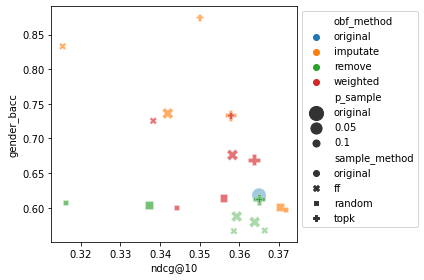

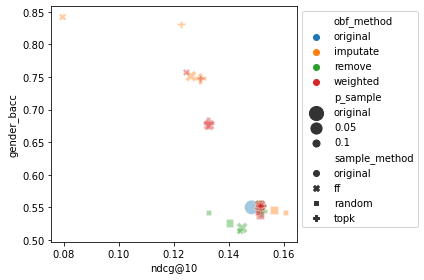

37 37 37 54
     dataset                                     dataset_name   ndcg@10  \
0   lfm-100k         lfm-100k_remove_0.1_ff_median-abs_th0.39  0.173126   
1   lfm-100k        lfm-100k_remove_0.05_ff_median-abs_th0.39  0.177390   
2   lfm-100k    lfm-100k_remove_0.05_random_median-abs_th0.39  0.168407   
3   lfm-100k  lfm-100k_weighted_0.05_random_median-abs_th0.39  0.170983   
4   lfm-100k     lfm-100k_remove_0.1_random_median-abs_th0.39  0.156372   
5   lfm-100k      lfm-100k_remove_0.05_topk_median-abs_th0.39  0.175855   
6   lfm-100k       lfm-100k_remove_0.1_topk_median-abs_th0.39  0.175855   
7   lfm-100k                                         lfm-100k  0.177325   
8   lfm-100k          lfm-100k_remove_0.05_ff_mean-abs_th0.39  0.176447   
9   lfm-100k      lfm-100k_remove_0.05_random_mean-abs_th0.39  0.176447   
10  lfm-100k        lfm-100k_remove_0.05_topk_mean-abs_th0.39  0.176447   
11  lfm-100k           lfm-100k_remove_0.1_ff_mean-abs_th0.39  0.176447   
12  lfm-100k 

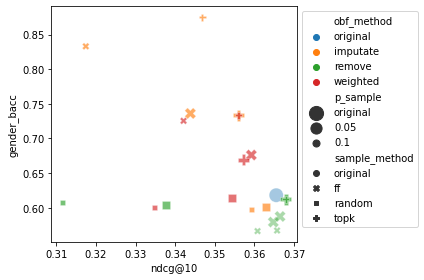

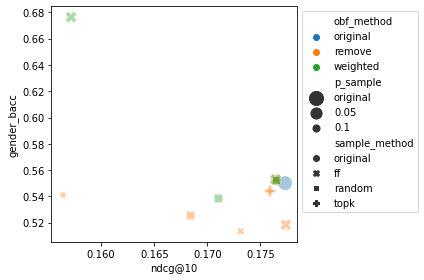

In [24]:

bpr_results = plot_results(alg="BPR_ALL")
multvae_results = plot_results(alg="MULTVAE_ALL")
lightgcn_results = plot_results(alg="LIGHTGCN_ALL")


In [ ]:
#Split dataset files for Mart
#datasets_to_train = merged_df.groupby(["dataset","obf_method"])["dataset_name"].apply(list)
#import json
#n=4
#for k,row in datasets_to_train.items():
#    
#    for  idx, group in  enumerate([row[i:i + n] for i in range(0, len(row), n)]):  
#        with open(f"/share/rk4/home/gustavoe/all_test_mean_stereo/{k[0]}/datasets.{k[1]}.part{idx}.json", "w") as f:
#            dict_group = {"datasets":group}
#            print(dict_group)
#            print(f"/share/rk4/home/gustavoe/all_test_mean_stereo/{k[0]}/datasets.{k[1]}.part{idx}.json")
#            json.dump(dict_group, f,indent=4)
